In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.interpolate import Rbf
import pandas as pd

## Approximating functions

In [3]:
def get_data(filename):
    data = np.loadtxt(filename)
    return data[:, 0], data[:, 1]

#### Implementation as instructed in task

In [3]:
def linearPlotImp(x,y,name):
    x = np.reshape(x, (-1, 1))
    y = np.reshape(y, (-1, 1))
    
    n = x.shape[1]
    r = np.linalg.matrix_rank(x)
    U, sigma, VT = np.linalg.svd(x, full_matrices=False)
    V = VT.T
    Dnew = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))
    Xnew = V.dot(Dnew).dot(U.T)
    A = Xnew.dot(y)
    mse = np.linalg.norm(x.dot(A) - y, ord=2)**2
    
    print("MSE: ", mse)
    plt.scatter(x, y, label='Original data')
    plt.plot(x, A*x, 'r', label='Fitted line')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.savefig(name, format="png")
    plt.show()

#### Using lstsq to check

In [4]:
def linearPlot(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    plt.scatter(x, y, label='Original data')
    plt.plot(x, m*x + c, 'r', label='Fitted line')
    plt.legend()
    plt.show()

### Part 1

MSE:  1.0611679491268273e-07


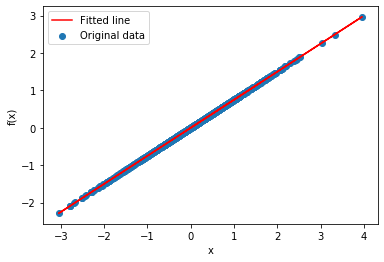

In [5]:
x, y = get_data('linear_function_data.txt')
linearPlotImp(x,y,"linear1.png")

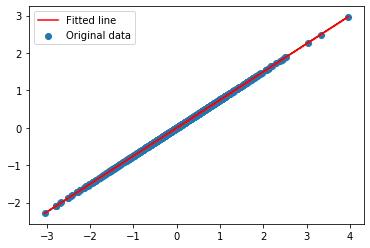

In [6]:
linearPlot(x, y)

### Second part

MSE:  774.8919879012243


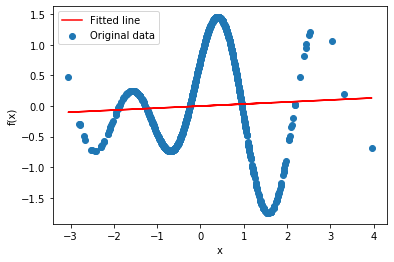

In [7]:
x, y = get_data('nonlinear_function_data.txt')
linearPlotImp(x, y, "nonlinear1.png")

### Third part

#### Implementation as instructed in the task

In [6]:
def rbf_plot(x, y, num_centers,name):
    N = len(x)
    stddev = np.std(x)
    x = np.reshape(x, (-1, 1))
    y = np.reshape(y, (-1, 1))
    idx = np.random.choice(a=N,size=num_centers)
    rand_centers=x[idx,:]
    
    beta = 0.5*np.power(1.0/stddev,2)
    Phi = np.exp(-beta*euclidean_distances(X=x, Y=rand_centers,squared=True))
    
    print("epilson: ", 1/beta)
    
    C = np.linalg.lstsq(Phi, y, rcond=None)[0]
    Y_predicted = np.dot(Phi, C)
    mse = np.linalg.norm(Y_predicted - y, ord=2)**2
    
    print("MSE: ", mse)
    
    plt.plot(x, y, 'o', label='Original data', markersize=1)
    plt.plot(x, Y_predicted, 'or', label='Fitted line', markersize=1)
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    #plt.savefig(name, format="png")
    plt.show()

#### Library function Rbf to check results

In [10]:
def lib_method_rbf(x, y):
    rbf = Rbf(x, y)
    fi = rbf(x)
    plt.plot(x, y, 'bo', markersize=1)
    plt.plot(x, fi, 'ro', markersize=1)

In [4]:
x, y = get_data('nonlinear_function_data.txt')

epilson:  1.9247382215841773
MSE:  0.3071740815721316


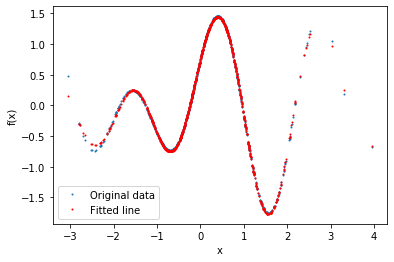

In [7]:
rbf_plot(x, y, 10, "nonlinear2.png")

/home/sabin/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/interpolate/rbf.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=5.11686e-22): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


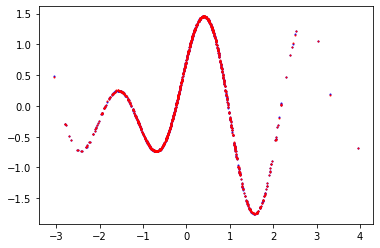

In [13]:
lib_method_rbf(x, y)

In [8]:
x, y = get_data('linear_function_data.txt')

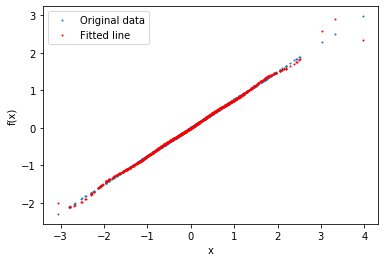

In [15]:
rbf_plot(x, y, 10, "linear2.png")

#### Using Rbf to check

/home/sabin/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/interpolate/rbf.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=5.11686e-22): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


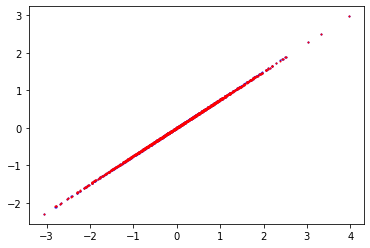

In [16]:
lib_method_rbf(x, y)

In [9]:
np.std(x)

0.9810041339322116